In [1]:
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from th_eventreader import TH_EventReader as py_reader
from th_eventreader import MatEventReader as mat_reader
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import warnings
warnings.filterwarnings('error')
exp_df = py_reader.exp_df()
row = exp_df.iloc[8]
events = py_reader.get_events(**row, recalc=True)

In [3]:
row.pop('session')
mat_events = mat_reader.get_events_from_mat(**row)
mat_events = mat_events[mat_events['session']==events['original_session_ID'].iloc[0]]

/home1/shai.goldman/anaconda2/envs/pgo_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
events[['mstime', 'pathInfo', 'session', 'original_session_ID']][50:55]

,mstime,pathInfo,session,original_session_ID
50,1464462355447,"[{'mstime': 1464462332048, 'x': 396.6075, 'y':...",1,2
51,1464462363180,"[{'mstime': 1464462337647, 'x': 391.8288, 'y':...",1,2
52,1464462382482,"[{'mstime': 1464462380447, 'x': 384.5869, 'y':...",1,2
53,1464462386163,"[{'mstime': 1464462383998, 'x': 384.5869, 'y':...",1,2
54,1464462390381,"[{'mstime': 1464462387681, 'x': 386.2133, 'y':...",1,2


In [5]:
mat_events[['mstime', 'pathInfo', 'session']][50:55]

,mstime,pathInfo,session
312,1464462355447,"[{'mstime': 1464462332048.0, 'x': 396.6075, 'y...",2
313,1464462363180,"[{'mstime': 1464462337647.0, 'x': 391.8288, 'y...",2
314,1464462382482,"[{'mstime': 1464462380447.0, 'x': 384.5869, 'y...",2
315,1464462386163,"[{'mstime': 1464462383998.0, 'x': 384.5869, 'y...",2
316,1464462390381,"[{'mstime': 1464462387681.0, 'x': 386.2133, 'y...",2


In [6]:
#event 0 is seomtimes SESS_START event which doesnt show up in pyhton
mat_events = mat_events[mat_events['type']!='SESS_START'] 
mat_events.index = range(len(mat_events))

In [7]:
py_path = events['pathInfo']
mat_path = mat_events['pathInfo']

In [8]:
start = 50

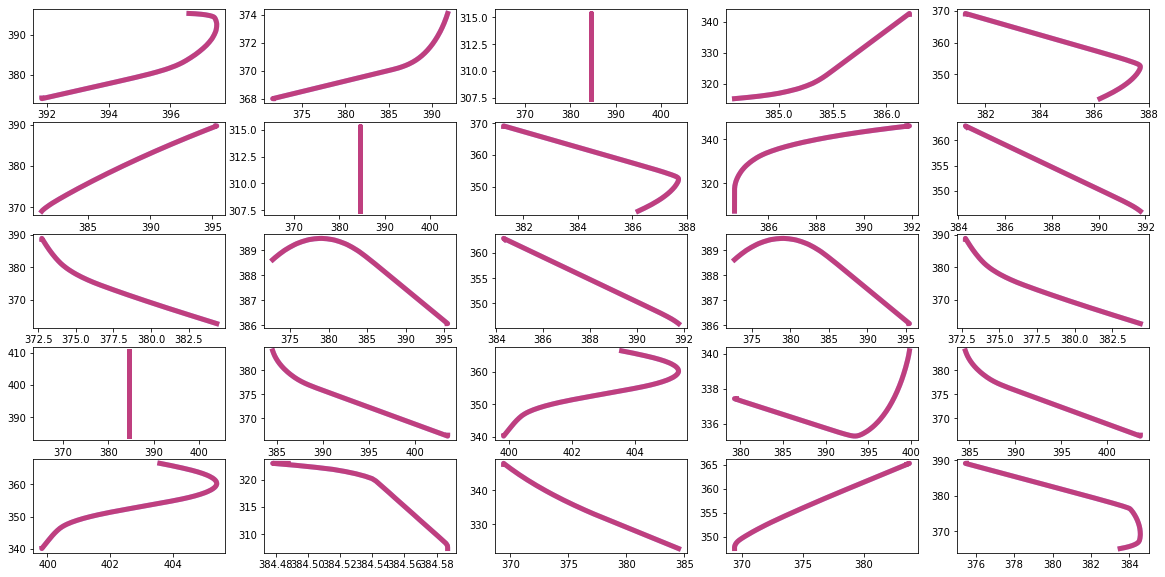

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(20, 10))
for i in range(25):
    pp = py_path.iloc[i+start]
    mp = mat_path.iloc[i+start]
    axes[int(i/5), i%5].plot(
        [p['x'] for p in pp], [p['y'] for p in pp], 
        linewidth=5, color='blue', alpha=.5)
    axes[int(i/5), i%5].plot(
        [p['x'] for p in mp], [p['y'] for p in mp], 
        linewidth=5, color='red', alpha=.5)

In [10]:
subj = 'R1289C'
montage = 0
session = 3
events = py_reader.get_events(subj, montage, session, 'TH1', recalc=True)


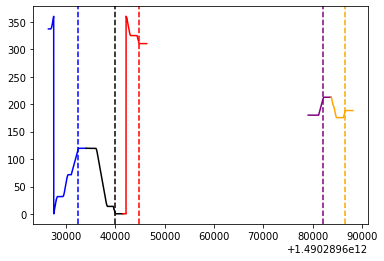

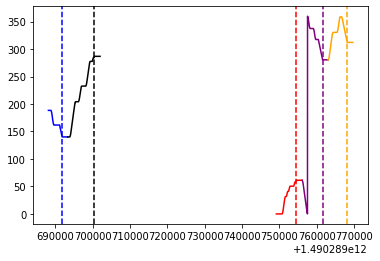

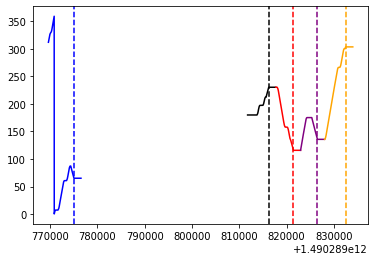

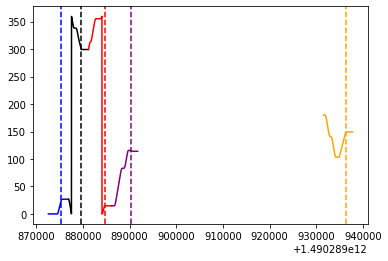

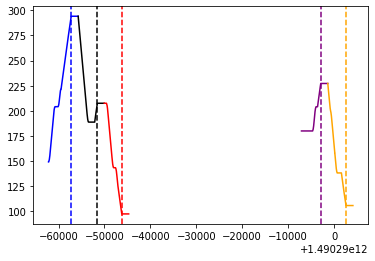

In [11]:
colors_list=('blue', 'black', 'red', 'purple', 'orange', 'lightblue',
        'pink', 'grey', 'green', 'brown')

cevents = events[events['type']=='CHEST']

for j in range(5, 10):
    colors = (i for i in colors_list)
    for i in range(0+j*5, 5+j*5):
        color = next(colors)
        plt.plot([t['mstime'] for t in cevents.iloc[i]['pathInfo']],
                 [t['heading'] for t in cevents.iloc[i]['pathInfo']], 
                 label=i, color=color)
        plt.axvline(cevents.iloc[i]['mstime'], linestyle='--', label=i, color=color)
    plt.show()

In [3]:
for i, row in exp_df.iterrows():
    print([key for key in row], end=' -> ')
    try:
        events = py_reader.get_events(**row, recalc=True)
        print('Success!')
    except FileNotFoundError as e:
        print(e)

['R1076D', 0, 0, 'TH1'] -> Success!
['R1076D', 0, 1, 'TH1'] -> Success!
['R1124J', 0, 0, 'TH1'] -> Success!
['R1132C', 0, 0, 'TH1'] -> Success!
['R1133C', 0, 0, 'TH1'] -> Success!
['R1145J', 0, 0, 'TH1'] -> Success!
['R1147P', 0, 0, 'TH1'] -> Success!
['R1154D', 0, 0, 'TH1'] -> Success!
['R1154D', 0, 1, 'TH1'] -> Success!
['R1154D', 0, 2, 'TH1'] -> Success!
['R1154D', 0, 3, 'TH1'] -> Success!
['R1155D', 0, 0, 'TH1'] -> Success!
['R1155D', 0, 1, 'TH1'] -> Success!
['R1155D', 0, 2, 'TH1'] -> Success!
['R1155D', 2, 4, 'TH1'] -> Success!
['R1156D', 0, 0, 'TH1'] -> Success!
['R1157C', 0, 0, 'TH1'] -> Success!
['R1157C', 0, 1, 'TH1'] -> Success!
['R1157C', 0, 2, 'TH1'] -> Success!
['R1160C', 0, 0, 'TH1'] -> Success!
['R1163T', 0, 0, 'TH1'] -> Success!
['R1163T', 0, 1, 'TH1'] -> Success!
['R1167M', 0, 0, 'TH1'] -> Success!
['R1167M', 0, 1, 'TH1'] -> Success!
['R1168T', 0, 0, 'TH1'] -> Success!
['R1170J', 0, 0, 'TH1'] -> Success!
['R1170J', 2, 2, 'TH1'] -> Success!
['R1170J', 2, 3, 'TH1'] -> S